In [ ]:
#Loading all prep packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import the data from 'games.csv'
df = pd.read_csv('games.csv')
df.head(5)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500.0,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84.0,2199.0,9.99,9.99,0.0,True
1,22364.0,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85.0,21.0,2.99,2.99,0.0,True
2,113020.0,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92.0,3722.0,14.99,14.99,0.0,True
3,226560.0,Escape Dead Island,2014-11-18,True,False,False,Mixed,61.0,873.0,14.99,14.99,0.0,True
4,249050.0,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88.0,8784.0,11.99,11.99,0.0,True


In [ ]:
df.describe

<bound method NDFrame.describe of           app_id                                      title date_release  \
0        13500.0          Prince of Persia: Warrior Within™   2008-11-21   
1        22364.0                    BRINK: Agents of Change   2011-08-03   
2       113020.0               Monaco: What's Yours Is Mine   2013-04-24   
3       226560.0                         Escape Dead Island   2014-11-18   
4       249050.0                    Dungeon of the ENDLESS™   2014-10-27   
...          ...                                        ...          ...   
50791  2195250.0                           EA SPORTS FC™ 24   2023-09-28   
50792  2362300.0                         Train Sim World® 4   2023-09-26   
50793  2296380.0  I Expect You To Die 3: Cog in the Machine   2023-09-28   
50794  1272080.0                                   PAYDAY 3   2023-09-21   
50795  1402110.0                                 Eternights   2023-09-11   

        win    mac  linux           rating  positive_

In [ ]:
df=df.drop(['app_id','title','date_release','win','mac','linux','rating','price_final','steam_deck'], axis=1)
df=pd.get_dummies(df)

In [ ]:
df

,positive_ratio,user_reviews,price_original,discount
0,84.0,2199.0,9.99,0.0
1,85.0,21.0,2.99,0.0
2,92.0,3722.0,14.99,0.0
3,61.0,873.0,14.99,0.0
4,88.0,8784.0,11.99,0.0
...,...,...,...,...
50791,55.0,4473.0,0.00,0.0
50792,65.0,351.0,0.00,0.0
50793,96.0,101.0,0.00,0.0
50794,38.0,29458.0,0.00,0.0


In [ ]:
#Saving the dataset
df.to_csv('Processed_Games', index=None)

In [ ]:
#Separating Features
X=df.drop('positive_ratio',axis=1)
y=df['positive_ratio']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=500,max_depth=20,max_features='auto',random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='auto', n_estimators=500,
                      random_state=42)

In [ ]:
# Make predictions
y_pred = rf_regressor.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 374.8032655928242
R-squared: -0.09540033695666184


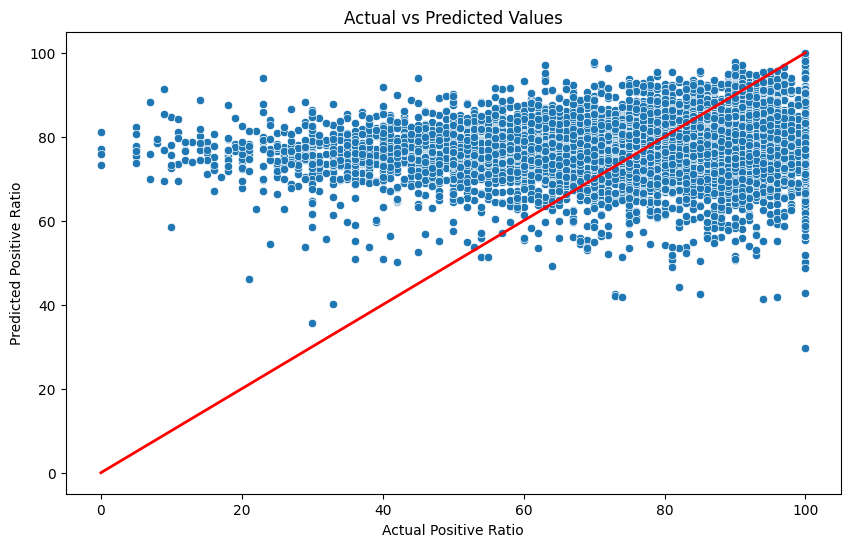

,positive_ratio,user_reviews,price_original,discount
0,84.0,2199.0,9.99,0.0
1,85.0,21.0,2.99,0.0
2,92.0,3722.0,14.99,0.0
3,61.0,873.0,14.99,0.0
4,88.0,8784.0,11.99,0.0
...,...,...,...,...
50791,55.0,4473.0,0.00,0.0
50792,65.0,351.0,0.00,0.0
50793,96.0,101.0,0.00,0.0
50794,38.0,29458.0,0.00,0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Actual vs Predicted scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Positive Ratio')
plt.ylabel('Predicted Positive Ratio')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line
plt.show()

df